In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv("attacks.csv",encoding = "ISO-8859-1")


In [25]:
df.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [ ]:
#vemos que hay muchas filas NaN

In [21]:
df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [26]:
#Eliminamos las dos columnas Unnamed al tener su totalidad de valores nulos
df.drop(["Unnamed: 22", "Unnamed: 23"], axis=1, inplace=True)

In [27]:
df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
dtype: int64

In [28]:
df.drop_duplicates().head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [31]:
#Eliminamos las lineas con totalidad de valores nulos
df = df.dropna(axis=0, how='all')
df.isna().sum()

Case Number                  1
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [85]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [67]:
selected_columns = df[["Case Number", "Date", "Year", "Type", "Area", "Location", "Activity", "Name","Sex ", "Age", "Injury", "Fatal (Y/N)", "Time", "Investigator or Source"]]
df2 = selected_columns.copy()
df2.head()

,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,A .Kipper


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Area                    5847 non-null   object 
 5   Location                5762 non-null   object 
 6   Activity                5758 non-null   object 
 7   Name                    6092 non-null   object 
 8   Sex                     5737 non-null   object 
 9   Age                     3471 non-null   object 
 10  Injury                  6274 non-null   object 
 11  Fatal (Y/N)             5763 non-null   object 
 12  Time                    2948 non-null   object 
 13  Investigator or Source  6285 non-null   object 
dtypes: float64(1), object(13)
memory usage:

In [96]:
df2["Sex "].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

<AxesSubplot:xlabel='Sex ', ylabel='count'>

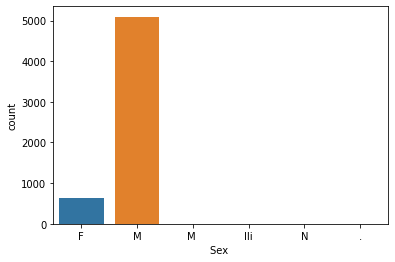

In [99]:
sns.countplot(x=df2["Sex "])

In [101]:
df12 = df2[df2["Sex "] == "M "]
df12

,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Investigator or Source
563,2014.04.22,22-Apr-2014,2014.0,Unprovoked,Florida,"Cocoa Beach, Brevard County",Swimming,male,M,42,Laceration & puncture wounds to right foot,N,15h30,"R. Neale, Florida Today, 4/22/2014"
1587,2005.05.15,15-May-2005,2005.0,Unprovoked,Queensland,50 km east of Townsville,Spearfishing,Ben Edelstein,M,NaN,Severe injury to lower leg,N,NaN,"J. Anderson, Townsville Bulletin, 5/21/2005"


In [ ]:
df12 = df2[df2["Sex "] == "M "]
df12

In [102]:
df13 = df2[df2["Sex "] == "lli"]
df13

,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Investigator or Source
1624,2004.11.11.b,11-Nov-2004,2004.0,Unprovoked,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,"R. Collier, GSAF"


In [103]:
df14 = df2[df2["Sex "] == "N"]
df14

,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Investigator or Source
4938,1934.07.11,11-Jul-1934,1934.0,Boating,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ..."
6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,"The Evening Post, 12/18/1801"


In [104]:
df15 = df2[df2["Sex "] == "."]
df15

,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Investigator or Source
5437,1908.06.02.R,Reported 02-Jun-1908,1908.0,Sea Disaster,New Britain,Matupi,.,NaN,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,"Taranaki Herald, 6/2/1908"


In [110]:
df16 = df2[df2["Sex "] == "NaN"]
df16

,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Investigator or Source
